In [2]:
#Import the packages needed.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.17.0


In [4]:
# Pre-fetch the data for the Learn Module
!mkdir -p ~/.keras/datasets
!wget -P ~/.keras/datasets -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


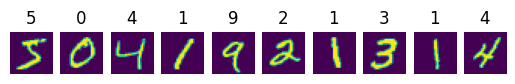

In [6]:
#Visualing the dataset
fig,ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [7]:
print('Training samples:',len(x_train))
print('Test samples:',len(x_test))

print('Tensor size:',x_train[0].shape)
print('First 10 digits are:', y_train[:10])
print('Type of data is ',type(x_train))

Training samples: 60000
Test samples: 10000
Tensor size: (28, 28)
First 10 digits are: [5 0 4 1 9 2 1 3 1 4]
Type of data is  <class 'numpy.ndarray'>


In [8]:
print('Min intensity value: ',x_train.min())
print('Max intensity value: ',x_train.max())

Min intensity value:  0
Max intensity value:  255


In [9]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [10]:
#expected outputs to have the same layout
#one-hot encoding. For example, digit 5 will be one-hot-encoded by a vector (0 0 0 0 0 1 0 0 0 0).
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:4])
print("One-hot-encoded version:\n",y_train_onehot[:4])

First 3 training labels: [5 0 4 1]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
#Model building
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(10,activation='softmax')])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print('Digit to be predicted: ',y_train[0])
model(np.expand_dims(x_train[0],0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.10519013, 0.08858448, 0.12350766, 0.08706601, 0.1373274 ,
        0.0780644 , 0.09748504, 0.09014376, 0.09083079, 0.10180031]],
      dtype=float32)>

In [13]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [14]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [15]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8302 - loss: 0.6616 - val_acc: 0.9142 - val_loss: 0.3013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9133 - loss: 0.3071 - val_acc: 0.9217 - val_loss: 0.2854
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9203 - loss: 0.2909 - val_acc: 0.9199 - val_loss: 0.2833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9235 - loss: 0.2815 - val_acc: 0.9225 - val_loss: 0.2813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9249 - loss: 0.2797 - val_acc: 0.9249 - val_loss: 0.2769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9268 - loss: 0.2733 - val_acc: 0.9269 - val_loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9264 - loss: 0.2765 - val_acc: 0.9249 - val_loss: 0.2769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9259 - loss: 0.2707 - val_acc: 0.9253 - val_loss: 0.2801
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/st

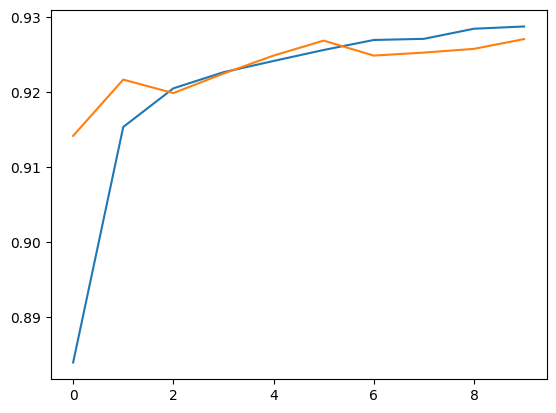

In [16]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

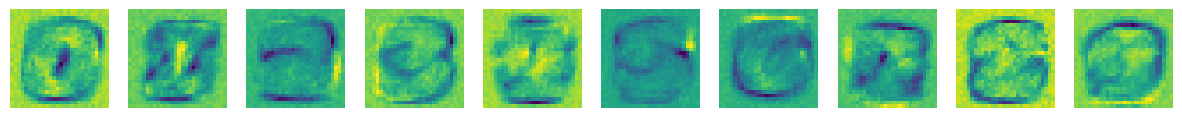

In [17]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

In [18]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes[:10])
# Evaluate the model on the test data to get accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

[7 2 1 0 4 1 4 9 6 9]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9160 - loss: 0.3158
Test accuracy: 0.9271000027656555


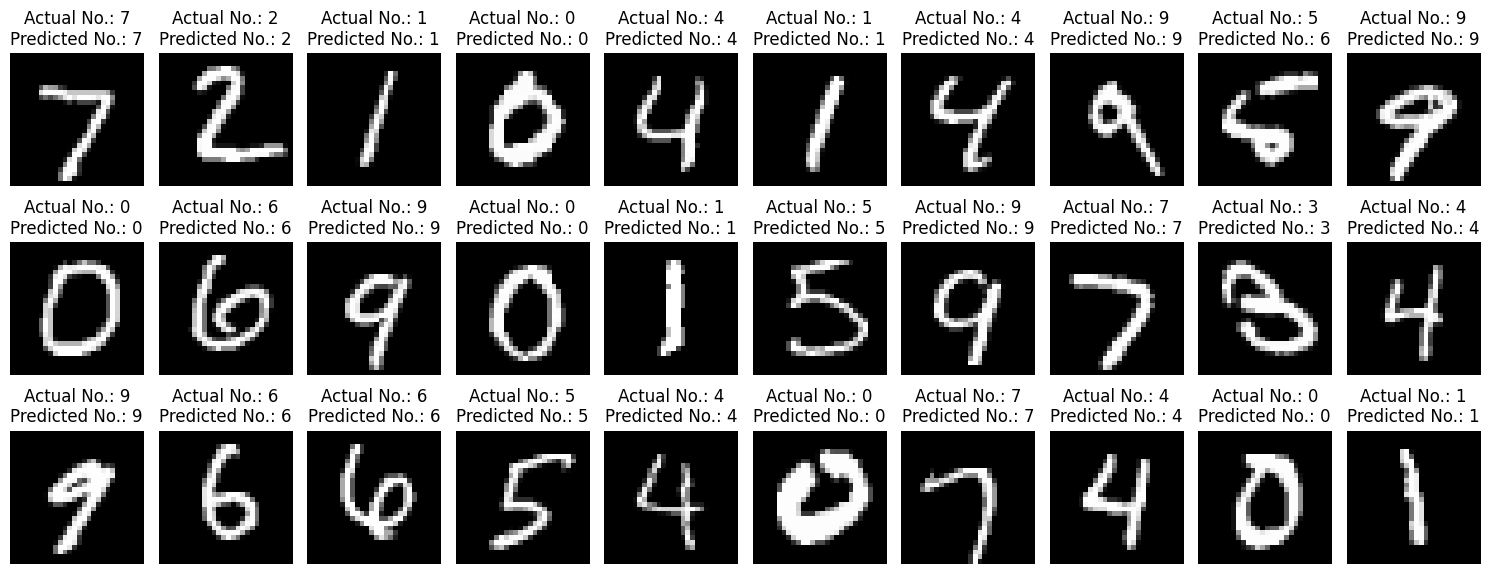

In [24]:
fig, axes = plt.subplots(3, 10, figsize=(15, 6))  # Adjust figsize for 3 rows
for i in range(30):  # Loop over the first 30 images
    row = i // 10    # Determine the row (integer division)
    col = i % 10     # Determine the column (modulo operation)

    axes[row, col].imshow(x_test[i], cmap='gray')  # Show the image in grayscale
    axes[row, col].axis('off')                     # Hide the axis
    true_label = y_test[i]
    predicted_label = predicted_classes[i]

    # Set title with true label and predicted label
    axes[row, col].set_title(f"Actual No.: {true_label}\nPredicted No.: {predicted_label}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [27]:
model.save('HWDR.keras')